<a href="https://colab.research.google.com/github/kafasg/CaravanProblem/blob/main/CaravanProplem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3

### George Fakas i6260280

- Read our data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sn

In [ ]:
Tr_data=pd.read_csv('caravan.csv',sep=',')
Tr_data

Customer Subtype  Number of houses  Avg size household  Avg Age  \
0                   33                 1                   3        2   
1                   37                 1                   2        2   
2                   37                 1                   2        2   
3                    9                 1                   3        3   
4                   40                 1                   4        2   
...                ...               ...                 ...      ...   
5817                36                 1                   1        2   
5818                35                 1                   4        4   
5819                33                 1                   3        4   
5820                34                 1                   3        2   
5821                33                 1                   3        3   

      Customer main type  Roman catholic  Protestant  Other religion  \
0                      8               0           5               1   
1                      8               1           4               1   
2                      8               0           4               2   
3                      3               2           3               2   
4                     10               1           4               1   
...                  ...             ...         ...             ...   
5817                   8               0           6               1   
5818                   8               1           4               1   
5819                   8               0           6               0   
5820                   8               0           7               0   
5821                   8               0           6               1   

      No religion  Married  ...  \
0               3        7  ...   
1               4        6  ...   
2               4        3  ...   
3               4        5  ...   
4               4        7  ...   
...           ...      ...  ...   
5817            2        1  ...   
5818            4        6  ...   
5819            3        5  ...   
5820            2        7  ...   
5821            2        7  ...   

      Number of private accident insurance policies  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   
...                                             ...   
5817                                              0   
5818                                              0   
5819                                              0   
5820                                              0   
5821                                              0   

      Number of family accidents insurance policies  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   
...                                             ...   
5817                                              0   
5818                                              0   
5819                                              0   
5820                                              0   
5821                                              0   

      Number of disability insurance policies  Number of re policies  \
0                                           0                      1   
1                                           0                      1   
2                                           0                      1   
3                                           0                      1   
4                                           0                      1   
...                                       ...                    ...   
5817             

In [ ]:
Y_tr = Tr_data['CARAVAN POLICY']
X_tr = Tr_data.drop('CARAVAN POLICY',axis=1)
X_tr

Customer Subtype  Number of houses  Avg size household  Avg Age  \
0                   33                 1                   3        2   
1                   37                 1                   2        2   
2                   37                 1                   2        2   
3                    9                 1                   3        3   
4                   40                 1                   4        2   
...                ...               ...                 ...      ...   
5817                36                 1                   1        2   
5818                35                 1                   4        4   
5819                33                 1                   3        4   
5820                34                 1                   3        2   
5821                33                 1                   3        3   

      Customer main type  Roman catholic  Protestant  Other religion  \
0                      8               0           5               1   
1                      8               1           4               1   
2                      8               0           4               2   
3                      3               2           3               2   
4                     10               1           4               1   
...                  ...             ...         ...             ...   
5817                   8               0           6               1   
5818                   8               1           4               1   
5819                   8               0           6               0   
5820                   8               0           7               0   
5821                   8               0           6               1   

      No religion  Married  ...  Number of life insurances  \
0               3        7  ...                          0   
1               4        6  ...                          0   
2               4        3  ...                          0   
3               4        5  ...                          0   
4               4        7  ...                          0   
...           ...      ...  ...                        ...   
5817            2        1  ...                          2   
5818            4        6  ...                          0   
5819            3        5  ...                          0   
5820            2        7  ...                          0   
5821            2        7  ...                          0   

      Number of private accident insurance policies  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   
...                                             ...   
5817                                              0   
5818                                              0   
5819                                              0   
5820                                              0   
5821                                              0   

      Number of family accidents insurance policies  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   
...                                             ...   
5817                                              0   
5818                                              0   
5819                                              0   
5820                                              0   
5821                                              0   

      Number of disability insurance policies  Number of re policies  \
0                                           0                      1   
1                                           0        

In [ ]:
Ts_data=pd.read_csv('caravanTest.csv',sep=',')
Ts_data

Customer Subtype  Number of houses  Avg size household  Avg Age  \
0                   33                 1                   4        2   
1                    6                 1                   3        2   
2                   39                 1                   3        3   
3                    9                 1                   2        3   
4                   31                 1                   2        4   
...                ...               ...                 ...      ...   
3995                33                 1                   2        4   
3996                24                 1                   2        3   
3997                36                 1                   2        3   
3998                33                 1                   3        3   
3999                 8                 1                   2        3   

      Customer main type  Roman catholic  Protestant  Other religion  \
0                      8               0           6               0   
1                      2               0           5               0   
2                      9               1           4               2   
3                      3               2           3               2   
4                      7               0           2               0   
...                  ...             ...         ...             ...   
3995                   8               0           7               2   
3996                   5               1           5               1   
3997                   8               1           5               1   
3998                   8               1           4               2   
3999                   2               4           3               0   

      No religion  Married  ...  \
0               3        5  ...   
1               4        5  ...   
2               3        5  ...   
3               4        5  ...   
4               7        9  ...   
...           ...      ...  ...   
3995            0        5  ...   
3996            3        4  ...   
3997            3        7  ...   
3998            3        7  ...   
3999            3        5  ...   

      Number of private accident insurance policies  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   
...                                             ...   
3995                                              0   
3996                                              0   
3997                                              0   
3998                                              0   
3999                                              0   

      Number of family accidents insurance policies  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   
...                                             ...   
3995                                              0   
3996                                              0   
3997                                              0   
3998                                              0   
3999                                              0   

      Number of disability insurance policies  Number of re policies  \
0                                           0                      1   
1                                           0                      1   
2                                           0                      1   
3                                           0                      1   
4                                           0                      1   
...                                       ...                    ...   
3995             

In [ ]:
Y_ts = Ts_data['CARAVAN POLICY']
X_ts = Ts_data.drop('CARAVAN POLICY',axis=1)
X_ts

Customer Subtype  Number of houses  Avg size household  Avg Age  \
0                   33                 1                   4        2   
1                    6                 1                   3        2   
2                   39                 1                   3        3   
3                    9                 1                   2        3   
4                   31                 1                   2        4   
...                ...               ...                 ...      ...   
3995                33                 1                   2        4   
3996                24                 1                   2        3   
3997                36                 1                   2        3   
3998                33                 1                   3        3   
3999                 8                 1                   2        3   

      Customer main type  Roman catholic  Protestant  Other religion  \
0                      8               0           6               0   
1                      2               0           5               0   
2                      9               1           4               2   
3                      3               2           3               2   
4                      7               0           2               0   
...                  ...             ...         ...             ...   
3995                   8               0           7               2   
3996                   5               1           5               1   
3997                   8               1           5               1   
3998                   8               1           4               2   
3999                   2               4           3               0   

      No religion  Married  ...  Number of life insurances  \
0               3        5  ...                          0   
1               4        5  ...                          2   
2               3        5  ...                          1   
3               4        5  ...                          0   
4               7        9  ...                          0   
...           ...      ...  ...                        ...   
3995            0        5  ...                          0   
3996            3        4  ...                          1   
3997            3        7  ...                          0   
3998            3        7  ...                          0   
3999            3        5  ...                          0   

      Number of private accident insurance policies  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   
...                                             ...   
3995                                              0   
3996                                              0   
3997                                              0   
3998                                              0   
3999                                              0   

      Number of family accidents insurance policies  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   
...                                             ...   
3995                                              0   
3996                                              0   
3997                                              0   
3998                                              0   
3999                                              0   

      Number of disability insurance policies  Number of re policies  \
0                                           0                      1   
1                                           0        

In [ ]:
Tr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 86 columns):
 #   Column                                            Non-Null Count  Dtype
---  ------                                            --------------  -----
 0   Customer Subtype                                  5822 non-null   int64
 1   Number of houses                                  5822 non-null   int64
 2   Avg size household                                5822 non-null   int64
 3   Avg Age                                           5822 non-null   int64
 4   Customer main type                                5822 non-null   int64
 5   Roman catholic                                    5822 non-null   int64
 6   Protestant                                        5822 non-null   int64
 7   Other religion                                    5822 non-null   int64
 8   No religion                                       5822 non-null   int64
 9   Married                                  

In [ ]:
Tr_data.describe()

Customer Subtype  Number of houses  Avg size household      Avg Age  \
count       5822.000000       5822.000000         5822.000000  5822.000000   
mean          24.253349          1.110615            2.678805     2.991240   
std           12.846706          0.405842            0.789835     0.814589   
min            1.000000          1.000000            1.000000     1.000000   
25%           10.000000          1.000000            2.000000     2.000000   
50%           30.000000          1.000000            3.000000     3.000000   
75%           35.000000          1.000000            3.000000     3.000000   
max           41.000000         10.000000            5.000000     6.000000   

       Customer main type  Roman catholic   Protestant  Other religion  \
count         5822.000000     5822.000000  5822.000000     5822.000000   
mean             5.773617        0.696496     4.626932        1.069907   
std              2.856760        1.003234     1.715843        1.017503   
min              1.000000        0.000000     0.000000        0.000000   
25%              3.000000        0.000000     4.000000        0.000000   
50%              7.000000        0.000000     5.000000        1.000000   
75%              8.000000        1.000000     6.000000        2.000000   
max             10.000000        9.000000     9.000000        5.000000   

       No religion      Married  ...  \
count  5822.000000  5822.000000  ...   
mean      3.258502     6.183442  ...   
std       1.597647     1.909482  ...   
min       0.000000     0.000000  ...   
25%       2.000000     5.000000  ...   
50%       3.000000     6.000000  ...   
75%       4.000000     7.000000  ...   
max       9.000000     9.000000  ...   

       Number of private accident insurance policies  \
count                                    5822.000000   
mean                                        0.005325   
std                                         0.072782   
min                                         0.000000   
25%                                         0.000000   
50%                                         0.000000   
75%                                         0.000000   
max                                         1.000000   

       Number of family accidents insurance policies  \
count                                    5822.000000   
mean                                        0.006527   
std                                         0.080532   
min                                         0.000000   
25%                                         0.000000   
50%                                         0.000000   
75%                                         0.000000   
max                                         1.000000   

       Number of disability insurance policies  Number of re policies  \
count                              5822.000000            5822.000000   
mean                                  0.004638               0.570079   
std                                   0.077403               0.562058   
min                                   0.000000               0.000000   
25%                                   0.000000               0.000000   
50%                                   0.000000               1.000000   
75%                                   0.000000               1.000000   
max                                   2.000000               7.000000   

       Number of surfboard policies  Number of boat policies  \
count                   5822.000000              5822.000000   
mean                       0.000515                 0.006012   
std                        0.022696                 0.081632   
min                        0.000000                 0.000000   
25%                        0.000000                 0.000000   
50%                        0.000000                 0.000000   
75%                        0.000000                 0.000000   
max                        1.000000                 2.000000   

       Number of bicycle polici

In [ ]:
# Scatterplots to search for linear and non-linear relationships and histograms.
#sn.pairplot(Tr_data, diag_kind='hist',  hue= 'CARAVAN POLICY', height=1.5,
#             diag_kws={"edgecolor":"k", "alpha":0.5},
#             plot_kws={"alpha":0.5})

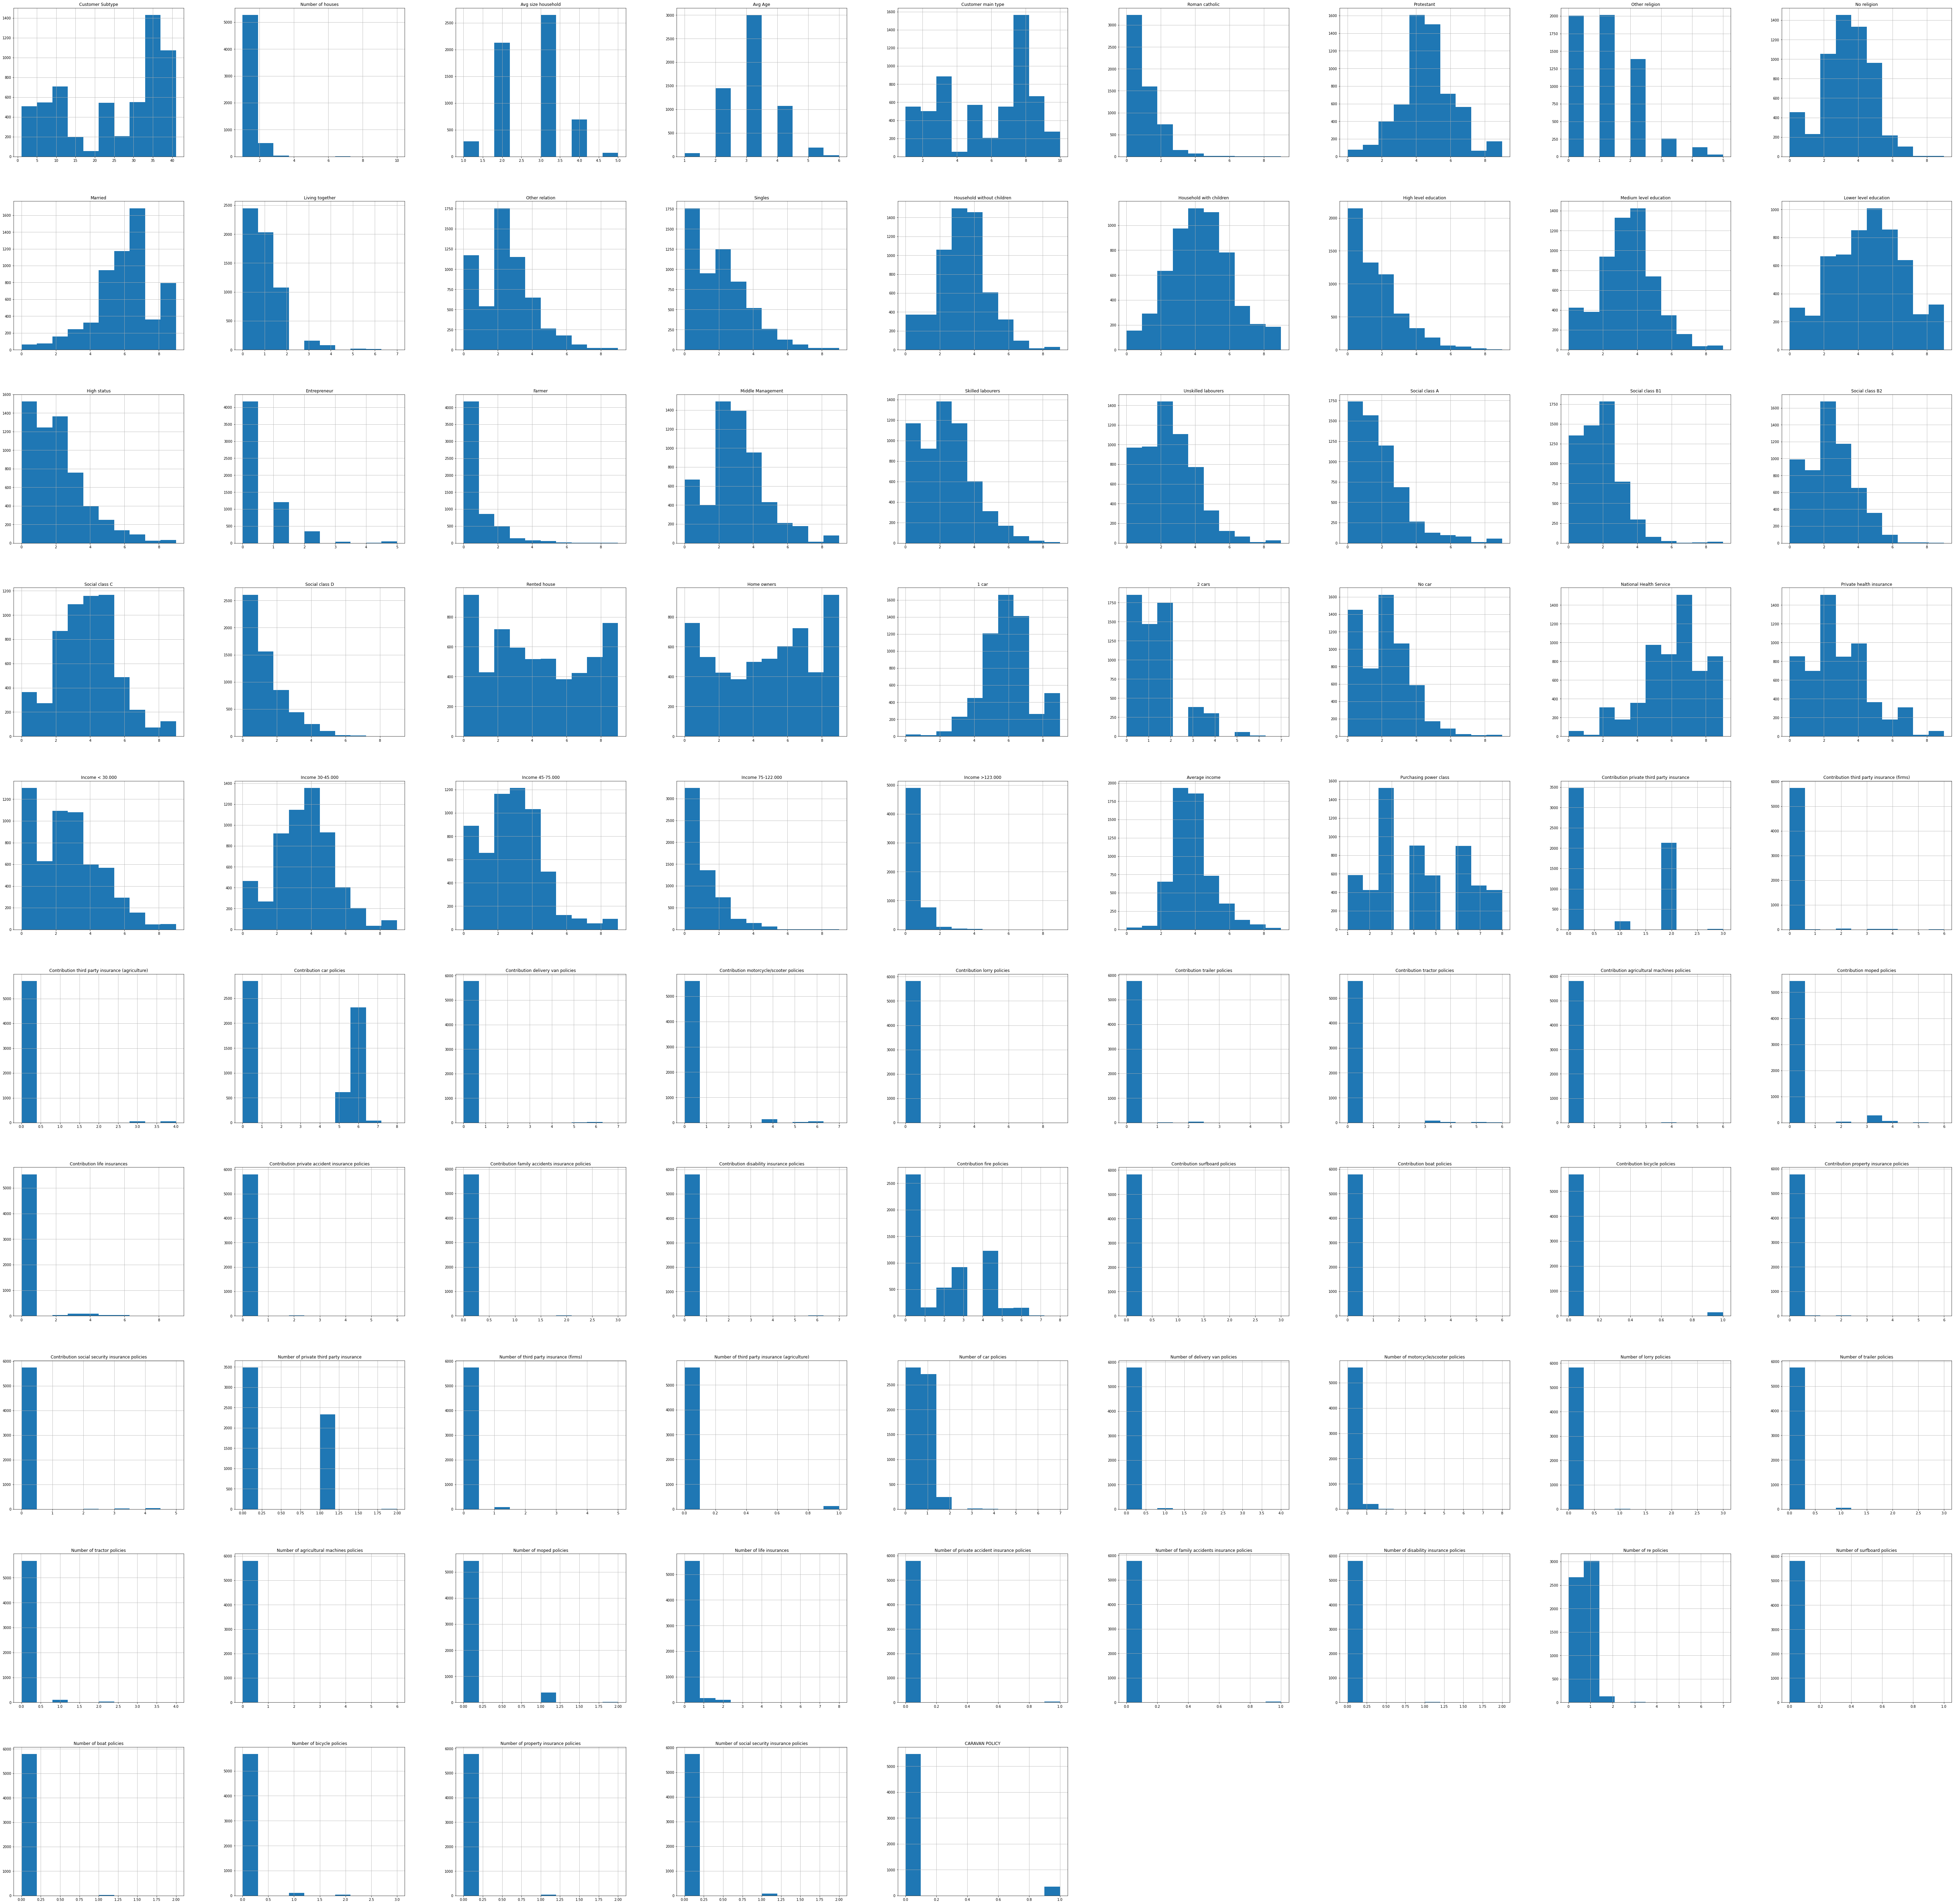

In [ ]:
Tr_data.hist(figsize=(100,100))
plt.show()

In [ ]:
fig = px.imshow(Tr_data.corr(),width=1200, height=1200)
fig.update_coloraxes(showscale=False)
fig.show()

In [ ]:
corr = Tr_data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

/var/folders/ls/0022dlg16w196bjq6t5qmf_h0000gn/T/ipykernel_3577/2644721610.py:2: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



# Assignment 1: Describe the actual or potential customers and possibly explain why these customers buy a caravan policy.

In [ ]:
corr_matrix = Tr_data.corr()
Sort_Corr=corr_matrix['CARAVAN POLICY'].sort_values(ascending=False)

In [ ]:
Sort_Corr[0:21]

CARAVAN POLICY                                     1.000000
Contribution car policies                          0.150910
Number of car policies                             0.144210
Number of boat policies                            0.105700
Contribution private third party insurance         0.096463
Purchasing power class                             0.095938
Contribution fire policies                         0.094446
Contribution boat policies                         0.091361
Average income                                     0.090185
Number of private third party insurance            0.089387
High level education                               0.084635
Home owners                                        0.078429
Married                                            0.070264
1 car                                              0.069974
Number of social security insurance policies       0.066658
High status                                        0.065082
Social class A                          

<AxesSubplot:>

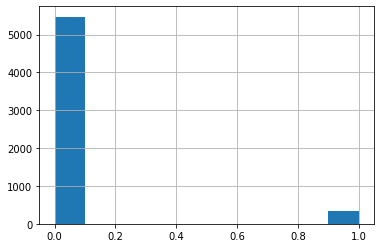

In [ ]:
Tr_data['CARAVAN POLICY'].hist()

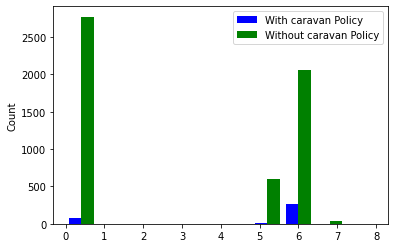

In [ ]:
fig, ax1 = plt.subplots()
ax1.hist([Tr_data[Tr_data['CARAVAN POLICY']==1]['Contribution car policies'],
          Tr_data[Tr_data['CARAVAN POLICY']==0]['Contribution car policies']],
         color=['b','g'],
         label=['With caravan Policy', 'Without caravan Policy'])
ax1.set_ylabel("Count")
plt.legend(loc='upper right')
plt.show()

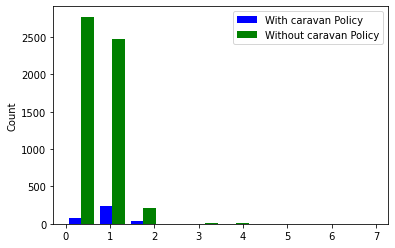

In [ ]:
fig, ax1 = plt.subplots()
ax1.hist([Tr_data[Tr_data['CARAVAN POLICY']==1]['Number of car policies'],
          Tr_data[Tr_data['CARAVAN POLICY']==0]['Number of car policies']],
         color=['b','g'],
         label=['With caravan Policy', 'Without caravan Policy'])
ax1.set_ylabel("Count")
plt.legend(loc='upper right')
plt.show()



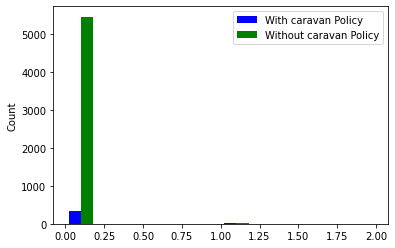

In [ ]:
fig, ax1 = plt.subplots()
ax1.hist([Tr_data[Tr_data['CARAVAN POLICY']==1]['Number of boat policies'],
          Tr_data[Tr_data['CARAVAN POLICY']==0]['Number of boat policies']],
         color=['b','g'],
         label=['With caravan Policy', 'Without caravan Policy'])
ax1.set_ylabel("Count")
plt.legend(loc='upper right')
plt.show()

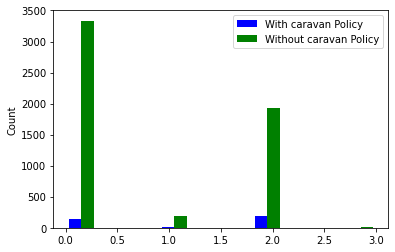

In [ ]:
fig, ax1 = plt.subplots()
ax1.hist([Tr_data[Tr_data['CARAVAN POLICY']==1]['Contribution private third party insurance'],
          Tr_data[Tr_data['CARAVAN POLICY']==0]['Contribution private third party insurance']],
         color=['b','g'],
         label=['With caravan Policy', 'Without caravan Policy'])
ax1.set_ylabel("Count")
plt.legend(loc='upper right')
plt.show()


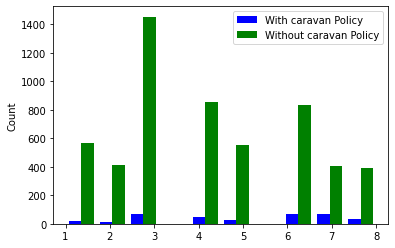

In [ ]:
fig, ax1 = plt.subplots()
ax1.hist([Tr_data[Tr_data['CARAVAN POLICY']==1]['Purchasing power class'],
          Tr_data[Tr_data['CARAVAN POLICY']==0]['Purchasing power class']],
         color=['b','g'],
         label=['With caravan Policy', 'Without caravan Policy'])
ax1.set_ylabel("Count")
plt.legend(loc='upper right')
plt.show()

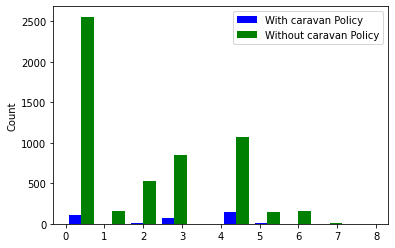

In [ ]:
fig, ax1 = plt.subplots()
ax1.hist([Tr_data[Tr_data['CARAVAN POLICY']==1]['Contribution fire policies'],
          Tr_data[Tr_data['CARAVAN POLICY']==0]['Contribution fire policies']],
         color=['b','g'],
         label=['With caravan Policy', 'Without caravan Policy'])
ax1.set_ylabel("Count")
plt.legend(loc='upper right')
plt.show()

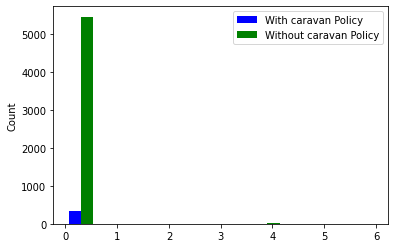

In [ ]:
fig, ax1 = plt.subplots()
ax1.hist([Tr_data[Tr_data['CARAVAN POLICY']==1]['Contribution boat policies'],
          Tr_data[Tr_data['CARAVAN POLICY']==0]['Contribution boat policies']],
         color=['b','g'],
         label=['With caravan Policy', 'Without caravan Policy'])
ax1.set_ylabel("Count")
plt.legend(loc='upper right')
plt.show()

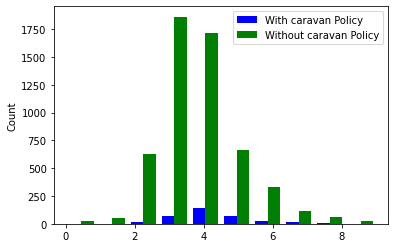

In [ ]:
fig, ax1 = plt.subplots()
ax1.hist([Tr_data[Tr_data['CARAVAN POLICY']==1]['Average income'],
          Tr_data[Tr_data['CARAVAN POLICY']==0]['Average income']],
         color=['b','g'],
         label=['With caravan Policy', 'Without caravan Policy'])
ax1.set_ylabel("Count")
plt.legend(loc='upper right')
plt.show()

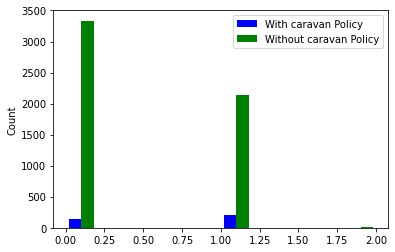

In [ ]:
fig, ax1 = plt.subplots()
ax1.hist([Tr_data[Tr_data['CARAVAN POLICY']==1]['Number of private third party insurance'],
          Tr_data[Tr_data['CARAVAN POLICY']==0]['Number of private third party insurance']],
         color=['b','g'],
         label=['With caravan Policy', 'Without caravan Policy'])
ax1.set_ylabel("Count")
plt.legend(loc='upper right')
plt.show()

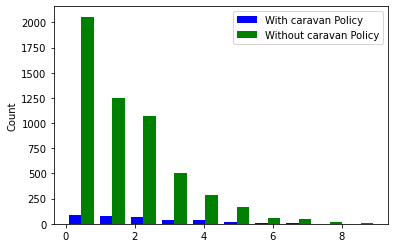

In [ ]:
fig, ax1 = plt.subplots()
ax1.hist([Tr_data[Tr_data['CARAVAN POLICY']==1]['High level education'],
          Tr_data[Tr_data['CARAVAN POLICY']==0]['High level education']],
         color=['b','g'],
         label=['With caravan Policy', 'Without caravan Policy'])
ax1.set_ylabel("Count")
plt.legend(loc='upper right')
plt.show()

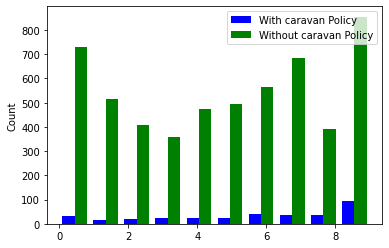

In [ ]:
fig, ax1 = plt.subplots()
ax1.hist([Tr_data[Tr_data['CARAVAN POLICY']==1]['Home owners'],
          Tr_data[Tr_data['CARAVAN POLICY']==0]['Home owners']],
         color=['b','g'],
         label=['With caravan Policy', 'Without caravan Policy'])
ax1.set_ylabel("Count")
plt.legend(loc='upper right')
plt.show()

From the above we can say that the 15 most correlated features describes the Caravan Policy owners.

Based on previous histogramms, a posible caravan policy buyer have 1 car policies, 6 car contribution policies. Posible they dont have boat policies and posibly they have 2 Contribution private third party insurance. They most likely have 8 houses and they belong to average income class 4. Most likely their higher educational level is classified as 0.

# Assignment 2: Select customers from a test file to send information to. The file with those customers will be provided on the day of lab’s deadline.

In [ ]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_classif
from sklearn.feature_selection import RFE


In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, f1_score
def plots(Y_ts,Y_pred):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    false_positive_rate, true_positive_rate, threshold = roc_curve(Y_ts, Y_pred)
    roc_score = roc_auc_score(Y_ts,Y_pred)
    ax1.set_title("Receiver Operating Characteristic")
    ax1.plot(false_positive_rate, true_positive_rate)
    ax1.plot([0, 1], ls="--")
    ax1.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    ax1.annotate('ROC: {:.5f}'.format(roc_score), [0.75,0.05])
    ax1.set_ylabel("True Positive Rate")
    ax1.set_xlabel("False Positive Rate")
    cm = pd.DataFrame(confusion_matrix(Y_ts, Y_pred,labels = [0,1]))
    ax2.set_title('Confusion matrix ')
    sn.heatmap(cm, annot=True, cmap="YlGnBu",fmt='g',cbar = False)
    ax2.set_ylabel('True')
    ax2.set_xlabel('Predicted')
    fig.tight_layout()
    plt.show()
    return

In [ ]:
def simple_clas(Classifier):
    Classifier.fit(X_tr, Y_tr)

    Y_pred=Classifier.predict(X_ts)
    score = Classifier.score(X_ts, Y_ts)
    plots(Y_ts,Y_pred)
    print(Classifier,'We have accuracy of: ', str(score.mean()))
    return

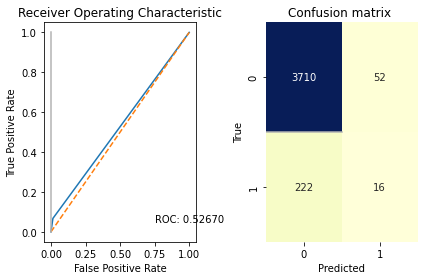

RandomForestClassifier() We have accuracy of:  0.9315


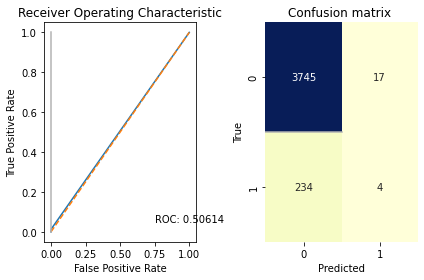

KNeighborsClassifier() We have accuracy of:  0.93725


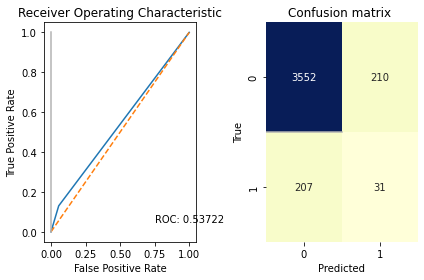

DecisionTreeClassifier() We have accuracy of:  0.89575


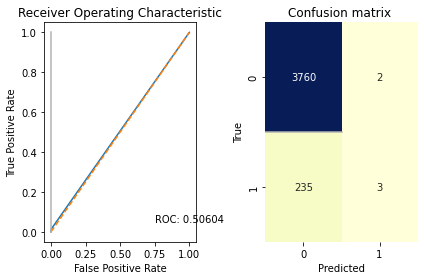

LogisticRegression() We have accuracy of:  0.94075


In [ ]:
simple_clas(RandomForestClassifier())
simple_clas(KNeighborsClassifier())
simple_clas(DecisionTreeClassifier())
simple_clas(LogisticRegression())

In [ ]:
def pipelin(classifier,n):
    pipeClassifier = make_pipeline(SelectKBest(chi2,k=n), classifier) #k is the number of variables selected
    pipeClassifier.fit(X_tr, Y_tr)
    Y_pred=pipeClassifier.predict(X_ts)
    score = pipeClassifier.score(X_ts, Y_ts)
    plots(Y_ts,Y_pred)
    print('We have accuracy of: ', str(score.mean()))
    return

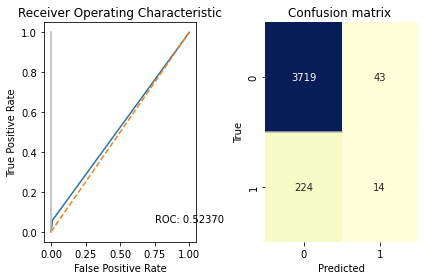

We have accuracy of:  0.93325


In [ ]:
pipelin(RandomForestClassifier(),40)

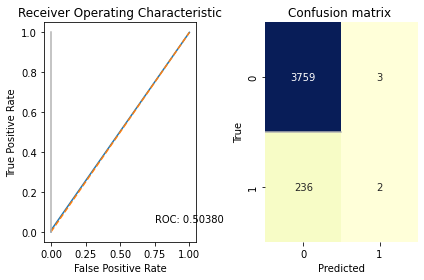

We have accuracy of:  0.94025


In [ ]:
pipelin(LogisticRegression(),10)

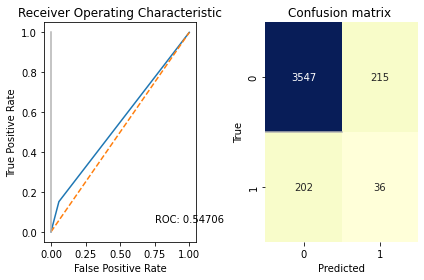

We have accuracy of:  0.89575


In [ ]:
pipelin(DecisionTreeClassifier(),45)

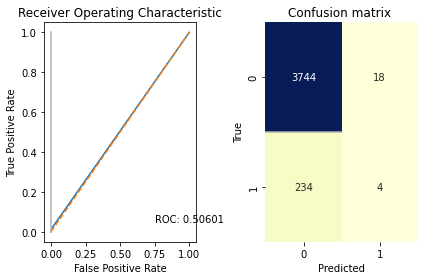

We have accuracy of:  0.937


In [ ]:
pipelin(KNeighborsClassifier(),25)

Pipeline(steps=[('selectkbest', SelectKBest()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_leaf_nodes=16, min_samples_leaf=7,
                                        min_samples_split=10,
                                        n_estimators=60))])
Train Accuracy:   79.2%
CV Mean Accuracy: 94.0%
Test Accuracy:    72.0%


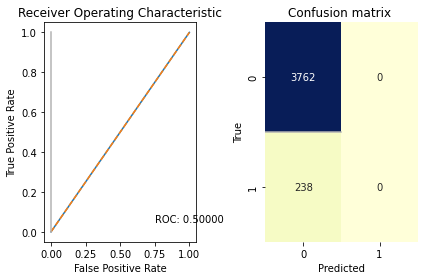

In [ ]:
# pipeline combining transformers and estimator
pipeline= make_pipeline(SelectKBest(f_classif), RandomForestClassifier())

# grid searh to choose the best (combination of) hyperparameters
grid_searh_RF=GridSearchCV(estimator= pipeline,
                           param_grid = {'selectkbest__k': [10],
                                         'randomforestclassifier__n_estimators': [40,60,100],
                                         'randomforestclassifier__min_samples_leaf':[3,7,17,31],
                                         'randomforestclassifier__max_leaf_nodes': [4,8,16,32,64],
                                         'randomforestclassifier__min_samples_split':[3,5,10,20,30],

                         },
                           n_jobs=-1,
                           scoring='roc_auc',
                           cv=10)

grid_searh_RF_scores = cross_val_score(grid_searh_RF, X=X_tr, y=Y_tr, cv=5,scoring='accuracy', n_jobs=-1)

# fit, and fit with best estimator
grid_searh_RF.fit(X_tr, Y_tr)
grid_searh_RF_best=grid_searh_RF.best_estimator_
grid_searh_RF_best.fit(X_tr, Y_tr)

print(grid_searh_RF_best)
print('Train Accuracy:   {0:.1f}%'.format(grid_searh_RF.score(X_tr, Y_tr)*100))
print('CV Mean Accuracy: {0:.1f}%'.format(np.mean(grid_searh_RF_scores)*100))
print('Test Accuracy:    {0:.1f}%'.format(grid_searh_RF.score(X_ts, Y_ts)*100))

Y_pred=grid_searh_RF_best.predict(X_ts)
plots(Y_ts,Y_pred)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('selectkbest', SelectKBest(k=5)),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=6))])
Train Accuracy:   94.1%
CV Mean Accuracy: 94.0%
Test Accuracy:    93.9%


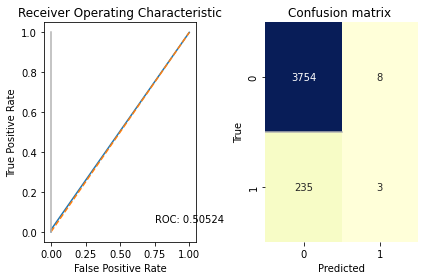

In [ ]:
# pipeline combining transformers and estimator
pipeline= make_pipeline(StandardScaler(),SelectKBest(f_classif), KNeighborsClassifier())

# grid searh to choose the best (combination of) hyperparameters
grid_searh_knn=GridSearchCV(estimator= pipeline,
               param_grid={'kneighborsclassifier__n_neighbors':[4,5,6,7,10,15,20,25,30,35,40],'selectkbest__k': [5,10,15,20,25,30,35,40,45]},
               scoring='accuracy',
               cv=10)

# nested cross validation combining grid search (inner loop) and k-fold cv (outter loop)
grid_searh_knn_scores = cross_val_score(grid_searh_knn, X=X_tr, y=Y_tr, cv=5,scoring='accuracy', n_jobs=-1)

# fit, and fit with best estimator
grid_searh_knn.fit(X_tr, Y_tr)
grid_searh_knn_best=grid_searh_knn.best_estimator_
grid_searh_knn_best.fit(X_tr, Y_tr)

print(grid_searh_knn_best)
print('Train Accuracy:   {0:.1f}%'.format(grid_searh_knn.score(X_tr, Y_tr)*100))
print('CV Mean Accuracy: {0:.1f}%'.format(np.mean(grid_searh_knn_scores)*100))
print('Test Accuracy:    {0:.1f}%'.format(grid_searh_knn.score(X_ts, Y_ts)*100))

Y_pred=grid_searh_knn_best.predict(X_ts)
plots(Y_ts,Y_pred)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('selectkbest', SelectKBest()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy',
                                        max_depth=40, max_features='auto'))])
Train Accuracy:   75.5%
CV Mean Accuracy: 94.0%
Test Accuracy:    67.7%


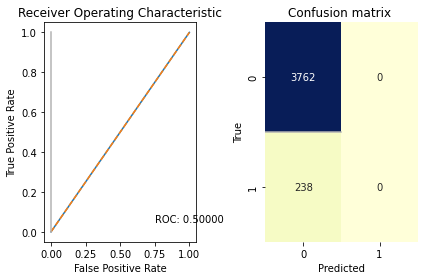

In [ ]:
# pipeline combining transformers and estimator
pipeline= make_pipeline(StandardScaler(),SelectKBest(f_classif), DecisionTreeClassifier())

# grid searh to choose the best (combination of) hyperparameters
grid_searh_dt=GridSearchCV(estimator= pipeline,
                           param_grid = {'selectkbest__k': [5,10,15,20,25,30,35,40,45],
                          'decisiontreeclassifier__max_features': ['auto', 'sqrt', 'log2'],
                          'decisiontreeclassifier__ccp_alpha': [0.1, .01, .001],
                          'decisiontreeclassifier__max_depth' : [4,5,6,7,8,9,10,11,12,15,20,30,40,50],
                          'decisiontreeclassifier__criterion' :['gini', 'entropy']
                         },
              scoring='roc_auc', n_jobs=-1)

grid_searh_dt_scores = cross_val_score(grid_searh_dt, X=X_tr, y=Y_tr, cv=5,scoring='accuracy', n_jobs=-1)

# fit, and fit with best estimator
grid_searh_dt.fit(X_tr, Y_tr)
grid_searh_dt_best=grid_searh_dt.best_estimator_
grid_searh_dt_best.fit(X_tr, Y_tr)

print(grid_searh_dt_best)
print('Train Accuracy:   {0:.1f}%'.format(grid_searh_dt.score(X_tr, Y_tr)*100))
print('CV Mean Accuracy: {0:.1f}%'.format(np.mean(grid_searh_dt_scores)*100))
print('Test Accuracy:    {0:.1f}%'.format(grid_searh_dt.score(X_ts, Y_ts)*100))

Y_pred=grid_searh_dt_best.predict(X_ts)
plots(Y_ts,Y_pred)


## PCA

In [ ]:
x = StandardScaler().fit_transform(X_tr)
x_ts=StandardScaler().fit_transform(X_ts)

In [ ]:
pca=PCA(n_components = 'mle')
after_pca=pca.fit_transform(x)

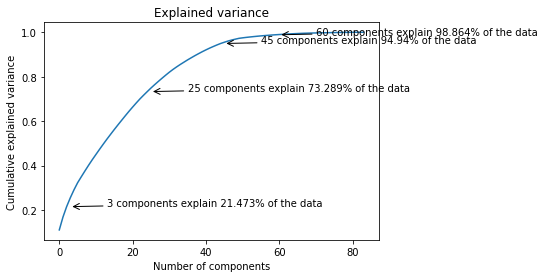

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
for i in [3,25,45,60]:
    plt.annotate(str(i)+' components explain ' + str(round(sum(pca.explained_variance_ratio_[:i])*100,3)) +'% of the data',xy=(i,sum(pca.explained_variance_ratio_[:i])),xytext=(10+i,sum(pca.explained_variance_ratio_[:i])),fontsize='medium',arrowprops={'arrowstyle':'->','mutation_scale':15})
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained variance')
plt.show()

In [ ]:
Pca_data = pd.DataFrame(data = after_pca)
Pca_data

0         1         2         3         4         5         6   \
0     0.550707  3.410686 -0.804213 -1.029871 -0.083947  0.258962 -0.195425   
1    -0.576122  0.025922 -0.404458 -2.059648  0.863661 -0.604844 -1.949084   
2     2.871990 -1.903902  0.138243 -2.445421  2.777318 -2.679845 -1.821069   
3    -1.554568 -1.175751 -0.575601 -0.362423  1.614971 -1.457542  0.337027   
4    -4.346824 -0.197035  0.976670  1.252781 -3.041040  1.343599 -0.377780   
...        ...       ...       ...       ...       ...       ...       ...   
5817  1.694763 -3.836569  2.000183 -3.758702  0.941077 -0.932287  0.678541   
5818  0.522813  2.564478  1.394358  2.594961  0.909483  0.947577 -1.063008   
5819  4.404311 -0.349153  0.791264 -2.123613 -1.345776  1.610674 -0.003931   
5820  0.256707  3.818818 -1.593291  0.634133  0.099750 -0.060529 -0.374321   
5821  1.640657  1.051763 -0.838544  0.364920 -0.601744  0.736640 -0.807231   

            7         8         9   ...        74        75        76  \
0    -0.094469  0.133187 -0.623486  ... -0.143520  0.023370 -0.120863   
1    -0.633307 -0.236770  1.223139  ...  0.023683  0.403778  0.205379   
2     0.834435 -0.370453 -0.184450  ... -0.055757 -0.060896 -0.025697   
3    -0.425847  0.656148 -0.872591  ... -0.224452 -0.058928 -0.289388   
4    -1.154248  0.539118  0.911733  ... -0.117638  0.052052  0.177183   
...        ...       ...       ...  ...       ...       ...       ...   
5817  1.287202 -0.133044 -1.575546  ... -0.080733 -0.005061  0.051048   
5818  1.655138  0.163275  3.235968  ... -0.140139 -0.205093 -0.383003   
5819 -0.450161  0.198883 -0.386994  ... -0.115277 -0.120723  0.224064   
5820  1.381950 -0.042087 -0.772146  ... -0.075449 -0.153642 -0.023364   
5821  0.519224 -0.542112  0.022030  ...  0.063270  0.244268  0.113737   

            77        78        79        80        81        82        83  
0     0.003183  0.029652 -0.047551  0.197733 -0.007919  0.044500  0.009593  
1    -0.108092  0.653086  1.120670  0.382806 -0.002846 -0.137838  0.006787  
2    -0.022811 -0.251001  0.089428 -0.082904 -0.000794 -0.099142 -0.003025  
3    -0.016775  0.010497  0.081730 -0.149946 -0.006637  0.176736 -0.008019  
4    -0.001257  0.051689 -0.013661 -0.063566  0.010725  0.110799  0.011995  
...        ...       ...       ...       ...       ...       ...       ...  
5817  0.009133 -0.121108  0.048413 -0.216538  0.013803 -0.018431  0.004315  
5818  0.101138 -0.104518  0.065688 -0.017381 -0.052201 -0.087915 -0.013212  
5819  0.026751  0.017537 -0.079795 -0.106854  0.006928  0.103437 -0.006706  
5820 -0.002516 -0.027745  0.017594 -0.018402  0.001454 -0.026798  0.002488  
5821 -0.010963  0.543582  0.482658  0.088999 -0.011063  0.065293 -0.007931  

[5822 rows x 84 columns]

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

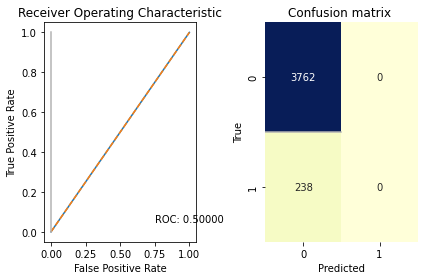

Retaining 0.1 variance we have 1 and we have accuracy of: 0.9405


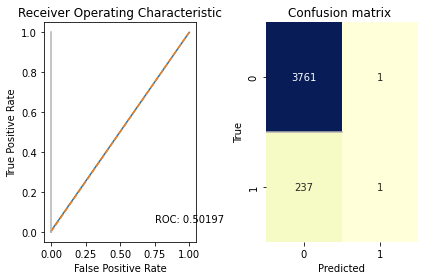

Retaining 0.5 variance we have 14 and we have accuracy of: 0.9405


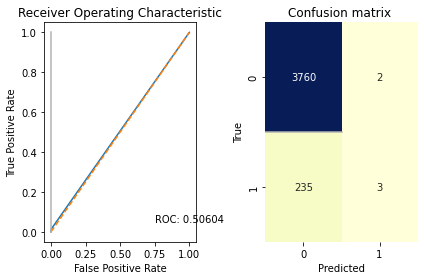

Retaining 0.7 variance we have 24 and we have accuracy of: 0.94075


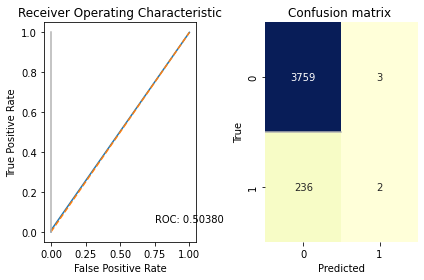

Retaining 0.8 variance we have 31 and we have accuracy of: 0.94025


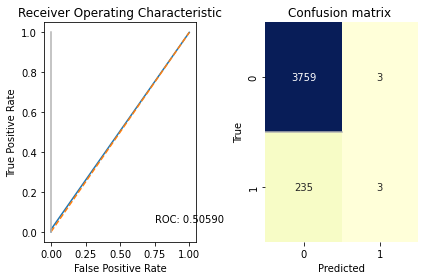

Retaining 0.9 variance we have 41 and we have accuracy of: 0.9405


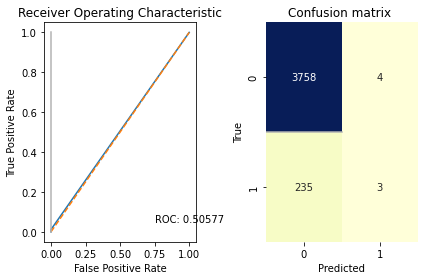

Retaining 0.95 variance we have 50 and we have accuracy of: 0.94025


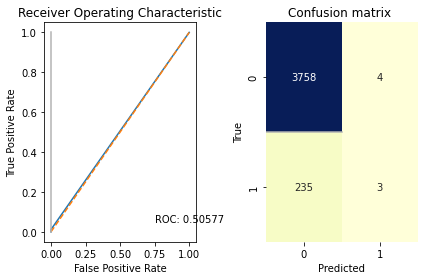

Retaining 0.99 variance we have 68 and we have accuracy of: 0.94025


In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

for i in [0.1, 0.5, 0.7, 0.8, 0.9, 0.95, 0.99]:
    pca = PCA(i)
    pca.fit(x)
    train_set = pca.transform(X_tr)
    test_set = pca.transform(X_ts)
    LR.fit(train_set, Y_tr)
    Y_pred=LR.predict(test_set)
    score = LR.score(test_set, Y_ts)
    plots(Y_ts,Y_pred)

    print('Retaining '+ str(i)+' variance we have '+ str(pca.n_components_)+ ' and we have accuracy of: '+ str(score.mean()))

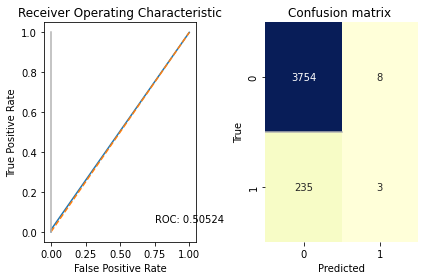

Retaining 0.1 variance we have 1 and we have accuracy of: 0.93925


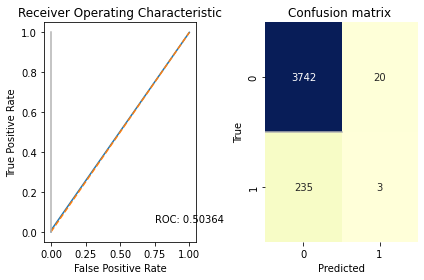

Retaining 0.5 variance we have 14 and we have accuracy of: 0.93625


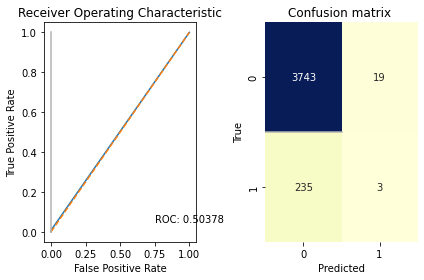

Retaining 0.7 variance we have 24 and we have accuracy of: 0.9365


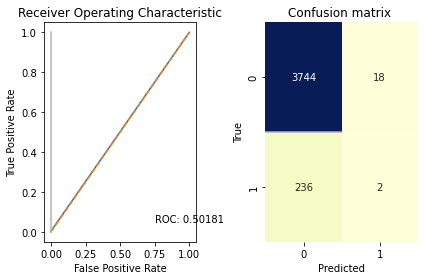

Retaining 0.8 variance we have 31 and we have accuracy of: 0.9365


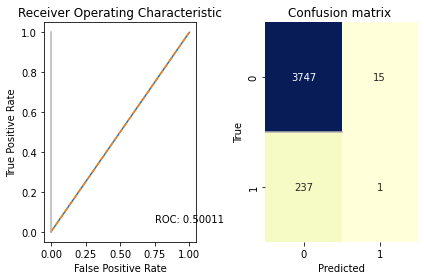

Retaining 0.9 variance we have 41 and we have accuracy of: 0.937


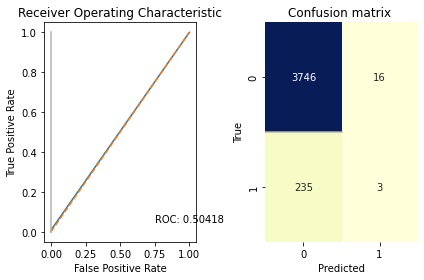

Retaining 0.95 variance we have 50 and we have accuracy of: 0.93725


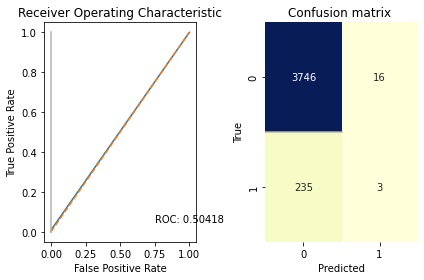

Retaining 0.99 variance we have 68 and we have accuracy of: 0.93725


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=5)

for i in [0.1, 0.5, 0.7, 0.8, 0.9, 0.95, 0.99]:
    pca = PCA(i)
    pca.fit(x)
    train_set = pca.transform(X_tr)
    test_set = pca.transform(X_ts)
    knn.fit(train_set, Y_tr)
    score = knn.score(test_set, Y_ts)
    Y_pred=knn.predict(test_set)
    plots(Y_ts,Y_pred)

    print('Retaining '+ str(i)+' variance we have '+ str(pca.n_components_)+ ' and we have accuracy of: '+ str(score.mean()))

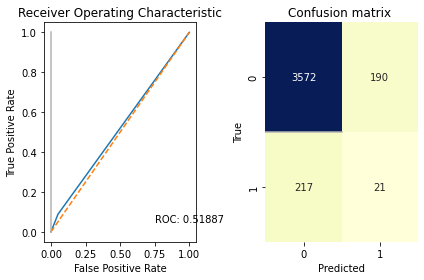

Retaining 0.1 variance we have 1 and we have accuracy of: 0.89825


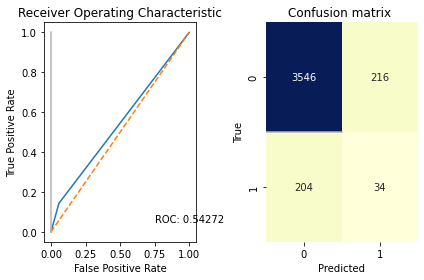

Retaining 0.5 variance we have 14 and we have accuracy of: 0.895


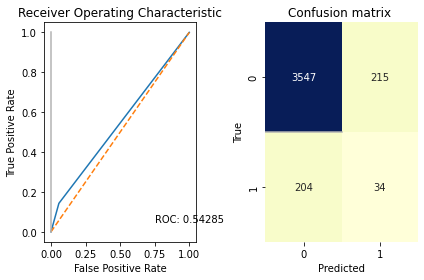

Retaining 0.7 variance we have 24 and we have accuracy of: 0.89525


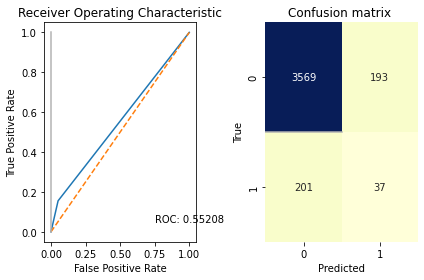

Retaining 0.8 variance we have 31 and we have accuracy of: 0.9015


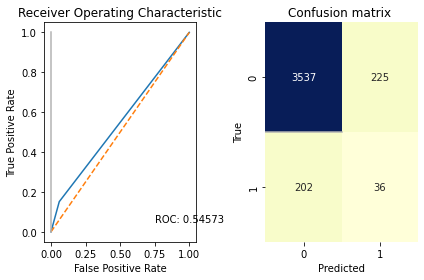

Retaining 0.9 variance we have 41 and we have accuracy of: 0.89325


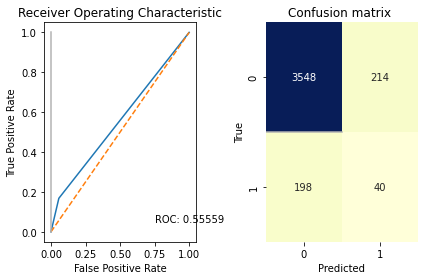

Retaining 0.95 variance we have 50 and we have accuracy of: 0.897


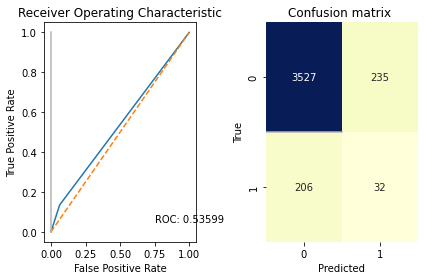

Retaining 0.99 variance we have 68 and we have accuracy of: 0.88975


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

for i in [0.1, 0.5, 0.7, 0.8, 0.9, 0.95, 0.99]:
    pca = PCA(i)
    pca.fit(x)
    train_set = pca.transform(X_tr)
    test_set = pca.transform(X_ts)
    dt.fit(train_set, Y_tr)
    score = dt.score(test_set, Y_ts)
    Y_pred=dt.predict(test_set)
    plots(Y_ts,Y_pred)

    print('Retaining '+ str(i)+' variance we have '+ str(pca.n_components_)+ ' and we have accuracy of: '+ str(score))

### SMOTE, Over Sample, Under Sample

In [ ]:
#!{sys.executable} -m pip install imblearn

In [ ]:
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
over_sampler = RandomOverSampler()
under_sampler = RandomUnderSampler()
smote = SMOTE()

In [ ]:
X_tr_under, Y_tr_under = over_sampler.fit_resample(X_tr,Y_tr)
X_tr_over, Y_tr_over = under_sampler.fit_resample(X_tr,Y_tr)
X_tr_smote, y_tr_smote = smote.fit_resample(X_tr,Y_tr)

In [ ]:
def simple_clas(Classifier,X_tr, Y_tr):
    Classifier.fit(X_tr, Y_tr)
    Y_pred=Classifier.predict(X_ts)
    score = Classifier.score(X_ts, Y_ts)
    plots(Y_ts,Y_pred)
    print(Classifier,'We have accuracy of: ', str(score.mean()))
    return

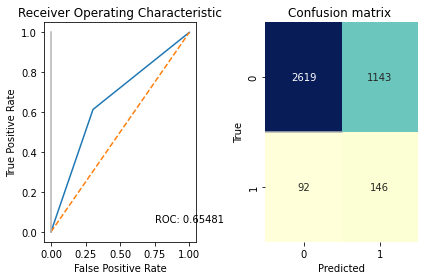

LogisticRegression() We have accuracy of:  0.69125


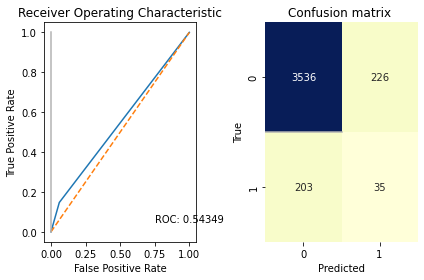

DecisionTreeClassifier() We have accuracy of:  0.89275


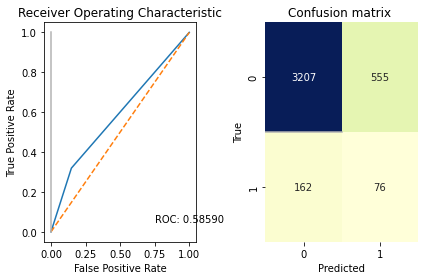

KNeighborsClassifier() We have accuracy of:  0.82075


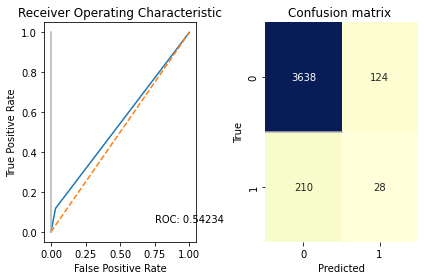

RandomForestClassifier() We have accuracy of:  0.9165


In [ ]:
simple_clas(LogisticRegression(),X_tr_under, Y_tr_under)
simple_clas(DecisionTreeClassifier(),X_tr_under, Y_tr_under)
simple_clas(KNeighborsClassifier(),X_tr_under, Y_tr_under)
simple_clas(RandomForestClassifier(),X_tr_under, Y_tr_under)

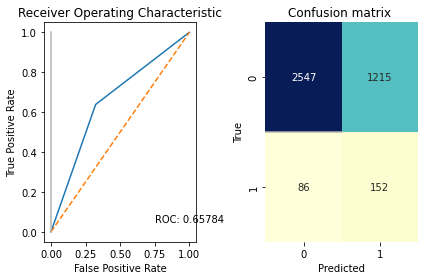

LogisticRegression() We have accuracy of:  0.67475


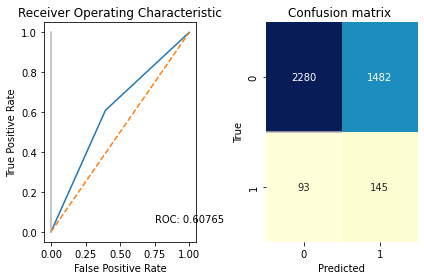

DecisionTreeClassifier() We have accuracy of:  0.60625


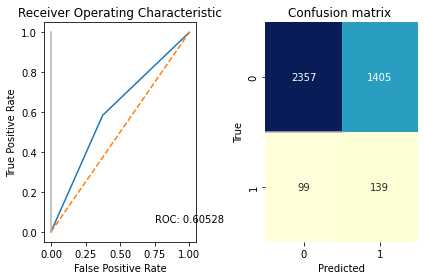

KNeighborsClassifier() We have accuracy of:  0.624


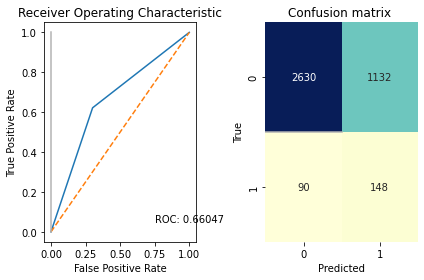

RandomForestClassifier() We have accuracy of:  0.6945


In [ ]:
simple_clas(LogisticRegression(),X_tr_over, Y_tr_over)
simple_clas(DecisionTreeClassifier(),X_tr_over, Y_tr_over)
simple_clas(KNeighborsClassifier(),X_tr_over, Y_tr_over)
simple_clas(RandomForestClassifier(),X_tr_over, Y_tr_over)

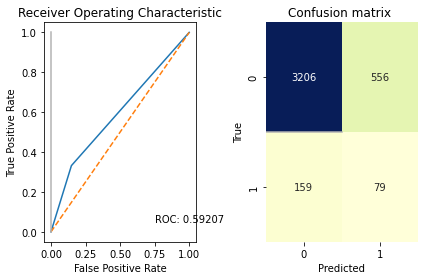

LogisticRegression() We have accuracy of:  0.82125


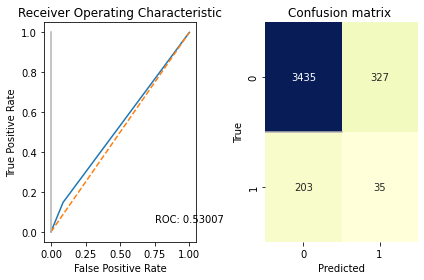

DecisionTreeClassifier() We have accuracy of:  0.8675


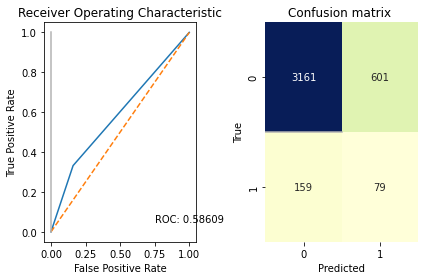

KNeighborsClassifier() We have accuracy of:  0.81


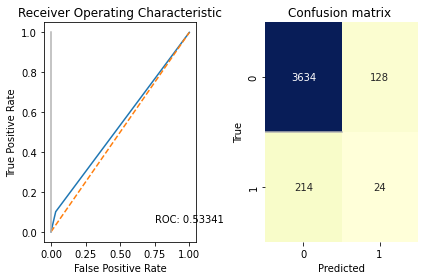

RandomForestClassifier() We have accuracy of:  0.9145


In [ ]:
simple_clas(LogisticRegression(),X_tr_smote, y_tr_smote)
simple_clas(DecisionTreeClassifier(),X_tr_smote, y_tr_smote)
simple_clas(KNeighborsClassifier(),X_tr_smote, y_tr_smote)
simple_clas(RandomForestClassifier(),X_tr_smote, y_tr_smote)

In [ ]:
def gs_knn_resample(X_tr,Y_tr):
    pipeline= make_pipeline(StandardScaler(),SelectKBest(f_classif), KNeighborsClassifier())

    grid_searh_knn=GridSearchCV(estimator= pipeline,
               param_grid={'kneighborsclassifier__n_neighbors':[4,5,6,7,10,15,20,25,30,35,40],'selectkbest__k': [5,10,15,20,25,30,35,40,45]},
               scoring='accuracy',
               cv=10)

    grid_searh_knn_scores = cross_val_score(grid_searh_knn, X=X_tr, y=Y_tr, cv=5,scoring='accuracy', n_jobs=-1)

    grid_searh_knn.fit(X_tr, Y_tr)
    grid_searh_knn_best=grid_searh_knn.best_estimator_
    grid_searh_knn_best.fit(X_tr, Y_tr)

    print(grid_searh_knn_best)
    print('Train Accuracy:   {0:.1f}%'.format(grid_searh_knn.score(X_tr, Y_tr)*100))
    print('CV Mean Accuracy: {0:.1f}%'.format(np.mean(grid_searh_knn_scores)*100))
    print('Test Accuracy:    {0:.1f}%'.format(grid_searh_knn.score(X_ts, Y_ts)*100))

    Y_pred=grid_searh_knn_best.predict(X_ts)
    plots(Y_ts,Y_pred)
    return

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('selectkbest', SelectKBest(k=45)),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=4))])
Train Accuracy:   96.2%
CV Mean Accuracy: 92.1%
Test Accuracy:    85.2%


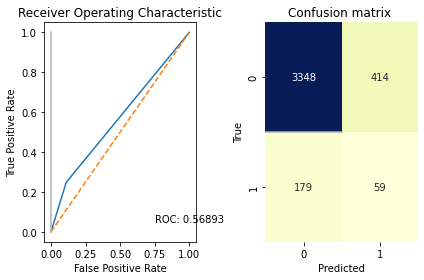

In [ ]:
gs_knn_resample(X_tr_smote, y_tr_smote)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('selectkbest', SelectKBest(k=45)),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=4))])
Train Accuracy:   96.6%
CV Mean Accuracy: 93.4%
Test Accuracy:    84.9%


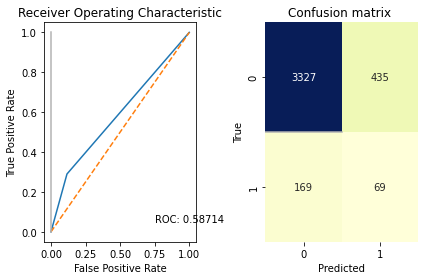

In [ ]:
gs_knn_resample(X_tr_under, Y_tr_under)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('selectkbest', SelectKBest(k=35)),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=35))])
Train Accuracy:   68.2%
Test Accuracy:    65.8%


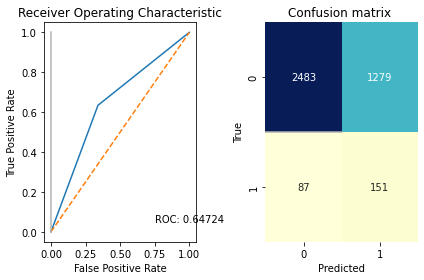

In [ ]:
pipeline= make_pipeline(StandardScaler(),SelectKBest(f_classif), KNeighborsClassifier())

grid_searh_knn=GridSearchCV(estimator= pipeline,
               param_grid={'kneighborsclassifier__n_neighbors':[4,5,6,7,10,15,20,25,30,35,40],'selectkbest__k': [5,10,15,20,25,30,35,40,45]},
               scoring='accuracy',
               cv=10)

#grid_searh_knn_scores = cross_val_score(grid_searh_knn, X=X_tr_over, y=Y_tr_over, cv=5,scoring='accuracy', n_jobs=-1)

grid_searh_knn.fit(X_tr_over, Y_tr_over)
grid_searh_knn_best=grid_searh_knn.best_estimator_
grid_searh_knn_best.fit(X_tr_over, Y_tr_over)

print(grid_searh_knn_best)
print('Train Accuracy:   {0:.1f}%'.format(grid_searh_knn.score(X_tr_over, Y_tr_over)*100))
#print('CV Mean Accuracy: {0:.1f}%'.format(np.mean(grid_searh_knn_scores)*100))
print('Test Accuracy:    {0:.1f}%'.format(grid_searh_knn.score(X_ts, Y_ts)*100))

Y_pred=grid_searh_knn_best.predict(X_ts)
plots(Y_ts,Y_pred)

In [ ]:
def gs_dt_resample(X_tr,Y_tr):
    pipeline= make_pipeline(StandardScaler(),SelectKBest(f_classif), DecisionTreeClassifier())
    grid_searh_dt=GridSearchCV(estimator= pipeline,
                           param_grid = {'selectkbest__k': [5,10,15,20,25,30,35,40,45],
                          'decisiontreeclassifier__max_features': ['auto', 'sqrt', 'log2'],
                          'decisiontreeclassifier__ccp_alpha': [0.1, .01, .001],
                          'decisiontreeclassifier__max_depth' : [4,5,6,7,8,9,10,11,12,15,20,30,40,50],
                          'decisiontreeclassifier__criterion' :['gini', 'entropy']
                         },
              scoring='roc_auc', n_jobs=-1)

    grid_searh_dt_scores = cross_val_score(grid_searh_dt, X=X_tr, y=Y_tr, cv=5,scoring='accuracy', n_jobs=-1)
    grid_searh_dt.fit(X_tr, Y_tr)
    grid_searh_dt_best=grid_searh_dt.best_estimator_
    grid_searh_dt_best.fit(X_tr, Y_tr)
    print(grid_searh_dt_best)
    print('Train Accuracy:   {0:.1f}%'.format(grid_searh_dt.score(X_tr, Y_tr)*100))
    print('CV Mean Accuracy: {0:.1f}%'.format(np.mean(grid_searh_dt_scores)*100))
    print('Test Accuracy:    {0:.1f}%'.format(grid_searh_dt.score(X_ts, Y_ts)*100))
    Y_pred=grid_searh_dt_best.predict(X_ts)
    plots(Y_ts,Y_pred)
    return

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('selectkbest', SelectKBest(k=40)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy',
                                        max_depth=50, max_features='log2'))])
Train Accuracy:   94.8%
CV Mean Accuracy: 84.6%
Test Accuracy:    61.7%


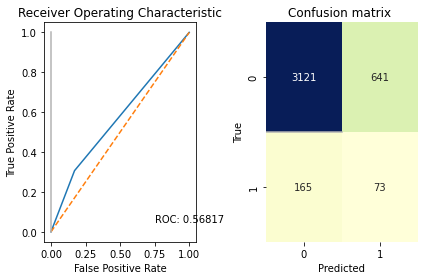

In [ ]:
gs_dt_resample(X_tr_smote, y_tr_smote)

/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute _pairwise was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute _pairwise was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('selectkbest', SelectKBest(k=45)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy',
                                        max_depth=50, max_features='auto'))])
Train Accuracy:   96.0%
CV Mean Accuracy: 90.8%
Test Accuracy:    61.6%


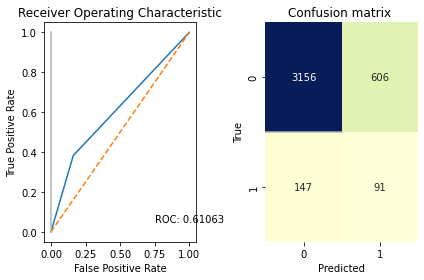

In [ ]:
gs_dt_resample(X_tr_under, Y_tr_under)

In [ ]:
gs_dt_resample(X_tr_over, Y_tr_over)

For the final answer we tryied differnent methods. We explore methods such as KNNeighbnours, LogisticRegression, DecisionTrees and Random Forest. We also tryied to reduce our space with PCA but with no effect. Finally we tried to different resample methods such as SMOTE, Over sample and Undersample because our dataset was really unbalanced. The metrics we had in order to find the best methos was the ROC metric. The overall classifier was
KNeighborsClassifier(n_neighbors=35)  
Train Accuracy:   68.2%  
Test Accuracy:    65.8%  
with ROC = 0.64724

And below we present the 800 most probable clients based on that prediction.

In [ ]:
Probable_clients=pd.DataFrame(grid_searh_knn_best.predict_proba(X_ts), columns=grid_searh_knn_best.classes_)
Probable_clients.sort_values(0).head(800)

0         1
3303  0.114286  0.885714
1383  0.114286  0.885714
2379  0.114286  0.885714
3726  0.114286  0.885714
3772  0.114286  0.885714
...        ...       ...
3029  0.400000  0.600000
2077  0.400000  0.600000
2923  0.400000  0.600000
3013  0.400000  0.600000
1491  0.400000  0.600000

[800 rows x 2 columns]